# Мусина Анастасия, МПИ-22-2-1

# **Разведочный анализ данных (EDA)**

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn. linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#построить распределение важных параметров
#больше визуализаций
#хитмап

Чтение данных из источника и создание dataframe

In [103]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Удаление дубликатов**

In [104]:
data.shape

(7043, 21)

In [105]:
# Используем метод drop_duplicates()
data = data.drop_duplicates()

In [106]:
data.shape
# Дубликатов не было обнаружено

(7043, 21)

**Обработка пропусков.** Если пропусков у признака слишком много (более 70%), то как правило, такой признак удаляют. Проверим насколько полных признаков в данном наборе. Используем метод isnull(), а также метод mean() суммирует все значения True и определяем концентрацию пропусков в каждом столбце. Умножаем на 100, чтобы получить значение в процентах.

В столбце TotalCharges хранятся данные типа Object. Чтобы посмотреть, есть ли в нем нулевые значения, приведем данные к типу float

In [107]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [108]:
data.isnull().mean()*100


customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

Столбец TotalCharges содержит 10 пустых строк, что составляет 0,15%. Таким значением можно принебречь. Поэтому следующим шагов удалим строки, содержащие нулевые значения

In [109]:
data = data.dropna()

В дальнейшем анализе не будем рассматривать столбец customerID, т.к. это просто идентификатор пользователя, и не имеет смысла его анализировать.

In [110]:
data = data.drop(columns=['customerID'])

Посмотрим, в каких столбцах различных данных более 5. Именно по ним в дальнейшем мы будем проверять наличие аномалиий

In [111]:
columns_of_many_val  = []
for _ in range(data.shape[1]):
    name_col =data.columns[_]
    count  = len(list(data[name_col].value_counts()))
    if count > 5: #множество различных  значений этого признака
        print(name_col)
        columns_of_many_val.append(name_col)

tenure
MonthlyCharges
TotalCharges


Посмотрим, какие значения хранятся в столбцах датасета

In [112]:
column_values = data[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                      #'tenure',
                      'PhoneService', 'MultipleLines'
, 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                     'StreamingTV' , 'StreamingMovies',  'Contract', 'PaperlessBilling', 'PaymentMethod',
                     # 'MonthlyCharges',
                     # 'TotalCharges',
                      'Churn']].values.ravel()
unique_values = pd.unique(column_values)
print(unique_values)

['Female' 0 'Yes' 'No' 'No phone service' 'DSL' 'Month-to-month'
 'Electronic check' 'Male' 'One year' 'Mailed check'
 'Bank transfer (automatic)' 'Fiber optic' 'Credit card (automatic)'
 'No internet service' 'Two year' 1]


**Обнаружение аномалий**

Самый легкий способ обнаружить выбросы – визуальный. Мы построим разновидность графика "boxplot" для  числовых переменных : tenure, MonthlyCharges, TotalCharges.

Для того, чтобы проводить дальнейший анализ столбца TotalCharges, переведем его в тип дaнных float

<Axes: >

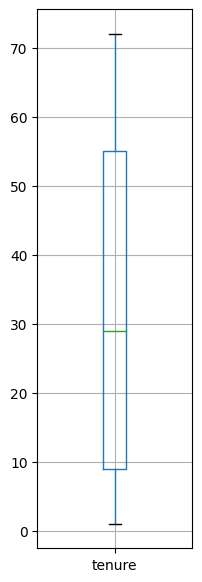

In [39]:
data.boxplot(column=['tenure'], figsize = (2,7))


<Axes: >

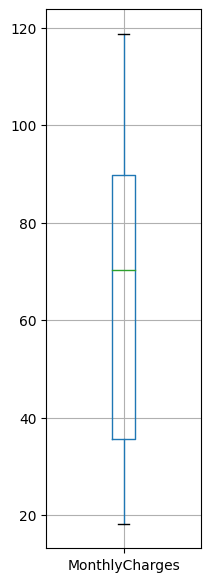

In [40]:
data.boxplot(column=['MonthlyCharges'], figsize = (2,7))

<Axes: >

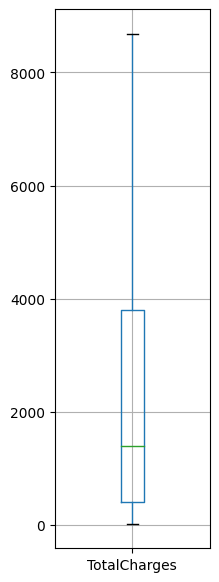

In [41]:
data.boxplot(column=['TotalCharges'], figsize = (2,7))

"Скучковавшиеся" окружности в верхней части изображения нет. Следовательно, аномалий не обнаружено. На всякий случай проведем обработку данных от аномалий с помощью квантилей:

In [113]:
q = data["tenure"].quantile(0.99)
q2 = data["MonthlyCharges"].quantile(0.99)
q3 = data["TotalCharges"].quantile(0.99)


data[data["tenure"] < q]
data[data["MonthlyCharges"] < q2]
data[data["TotalCharges"] < q3]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [47]:
#!pip3 install pandas-profiling==3.6.6
!pip3 install pandas-profiling

In [48]:
!pip install ydata-profiling

**ОПИСАТЕЛЬНАЯ СТАТИСТИКА**

In [52]:
import pandas as pd
from ydata_profiling import ProfileReport

In [53]:
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Корреляция**


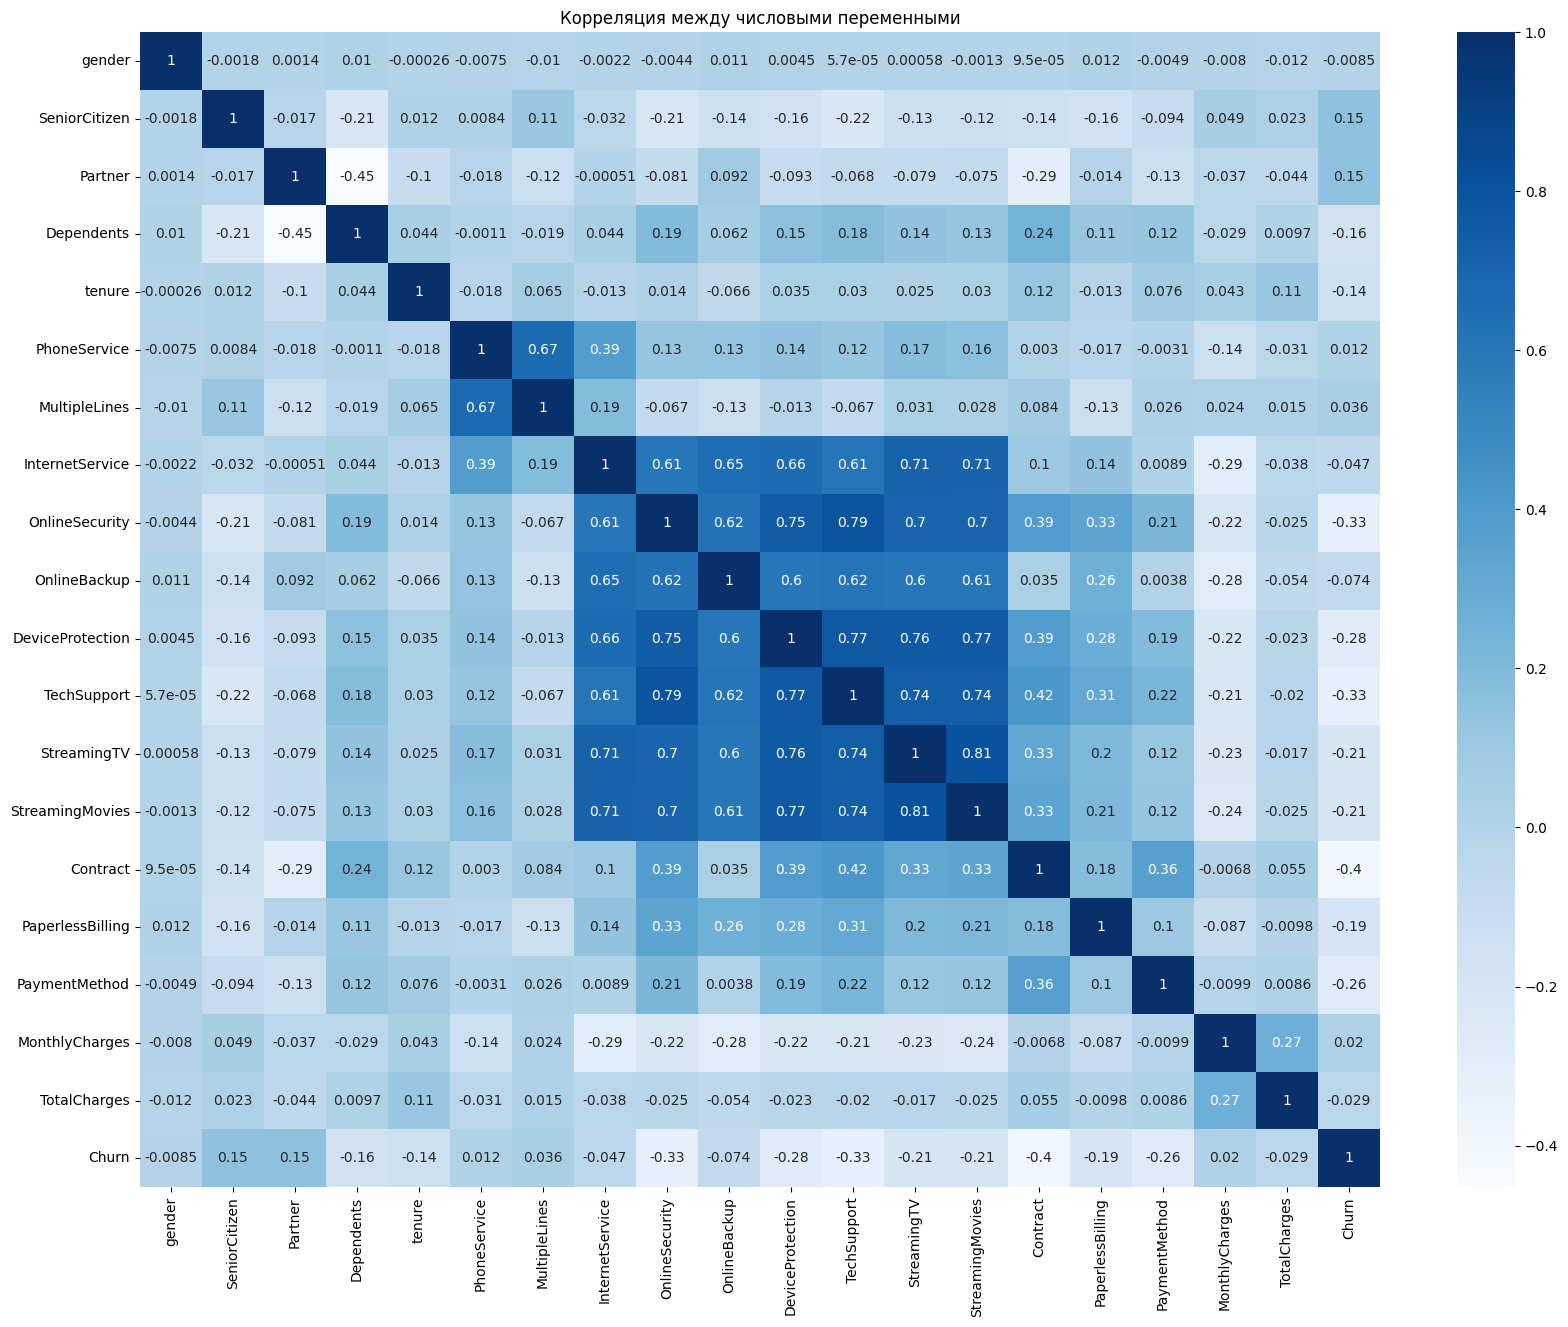

In [46]:
# Корреляция между числовыми переменными
plt.figure(figsize=(20,15))
sb.heatmap(data.apply(lambda x : pd.factorize(x)[0]).corr(), annot=True, cmap="Blues")
plt.title("Корреляция между числовыми переменными")
plt.show()

**Распределение признаков**

Построим распределение признаков, наиболее влияющиъ на целевую переменную Churn

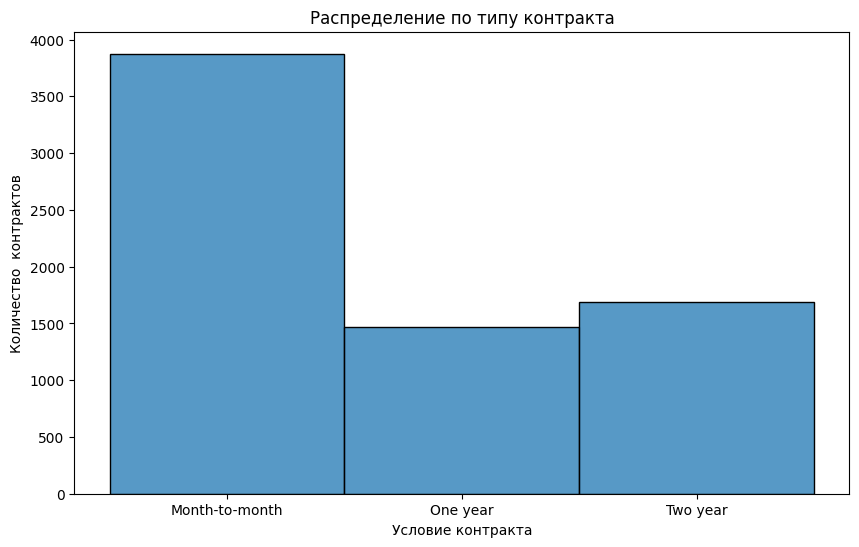

In [121]:
plt.figure(figsize=(10,6))
sb.histplot(data["Contract"], bins=20)
plt.title("Распределение по типу контракта")
plt.xlabel("Условие контракта")
plt.ylabel("Количество контрактов")
plt.show()

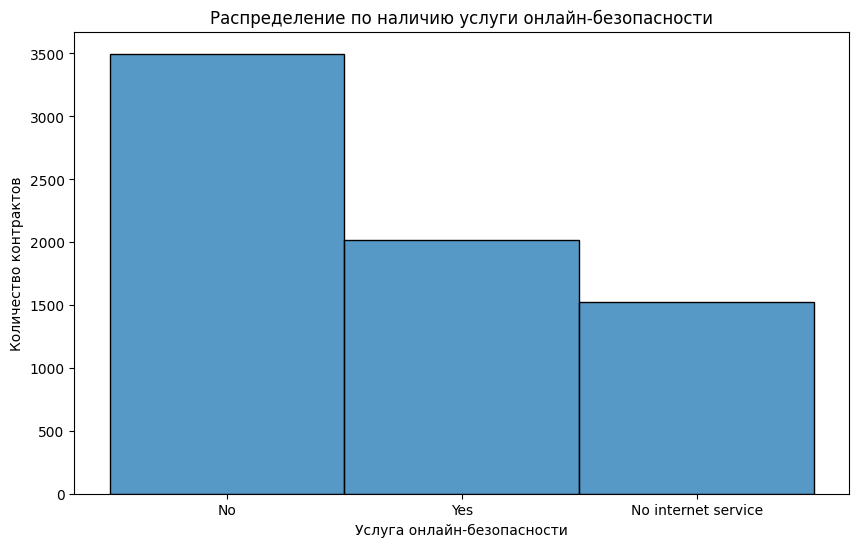

In [125]:
plt.figure(figsize=(10,6))
sb.histplot(data["OnlineSecurity"], bins=20)
plt.title("Распределение по наличию услуги онлайн-безопасности")
plt.xlabel("Услуга онлайн-безопасности")
plt.ylabel("Количество контрактов")
plt.show()

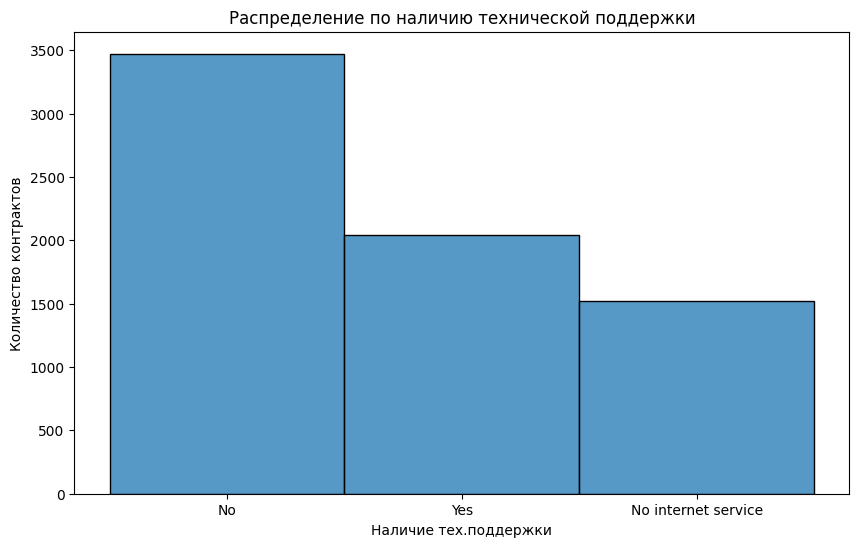

In [124]:
plt.figure(figsize=(10,6))
sb.histplot(data["TechSupport"], bins=20)
plt.title("Распределение по наличию технической поддержки")
plt.xlabel("Наличие тех.поддержки")
plt.ylabel("Количество контрактов")
plt.show()

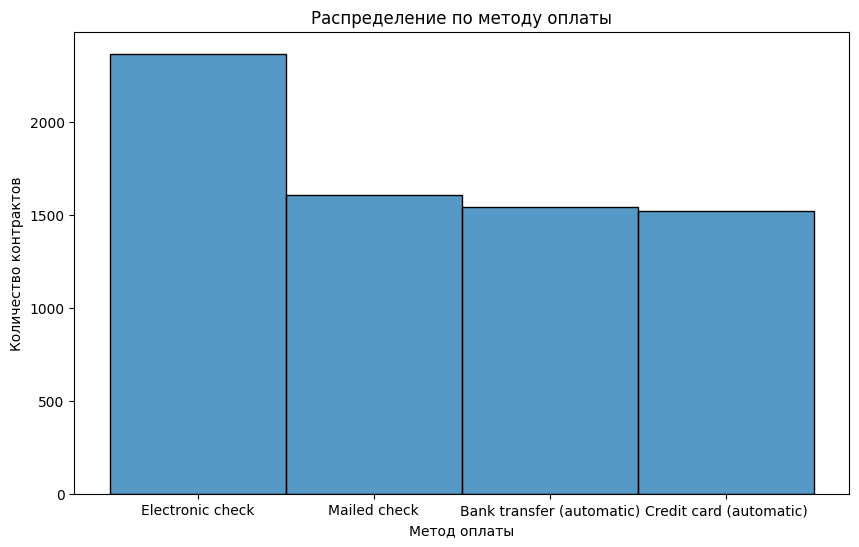

In [127]:
plt.figure(figsize=(10,6))
sb.histplot(data["PaymentMethod"], bins=20)
plt.title("Распределение по методу оплаты")
plt.xlabel("Метод оплаты")
plt.ylabel("Количество контрактов")
plt.show()

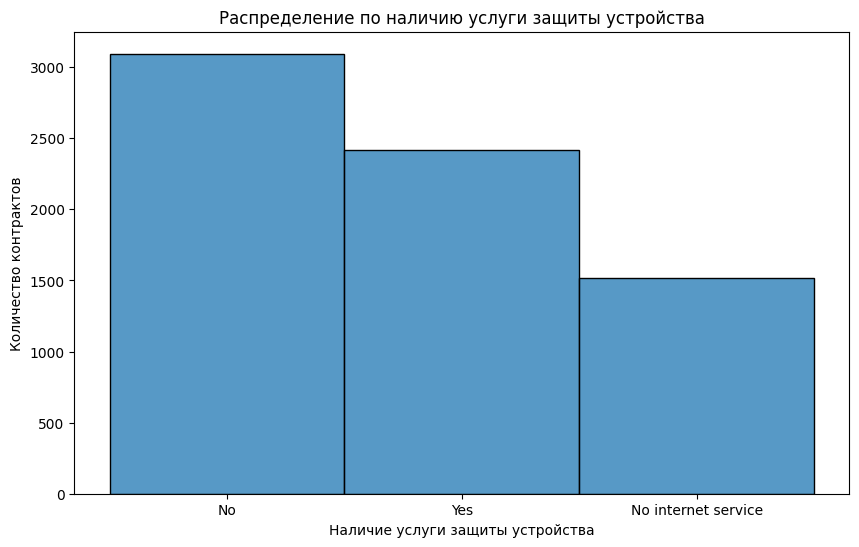

In [128]:
plt.figure(figsize=(10,6))
sb.histplot(data["DeviceProtection"], bins=20)
plt.title("Распределение по наличию услуги защиты устройства")
plt.xlabel("Наличие услуги защиты устройства")
plt.ylabel("Количество контрактов")
plt.show()

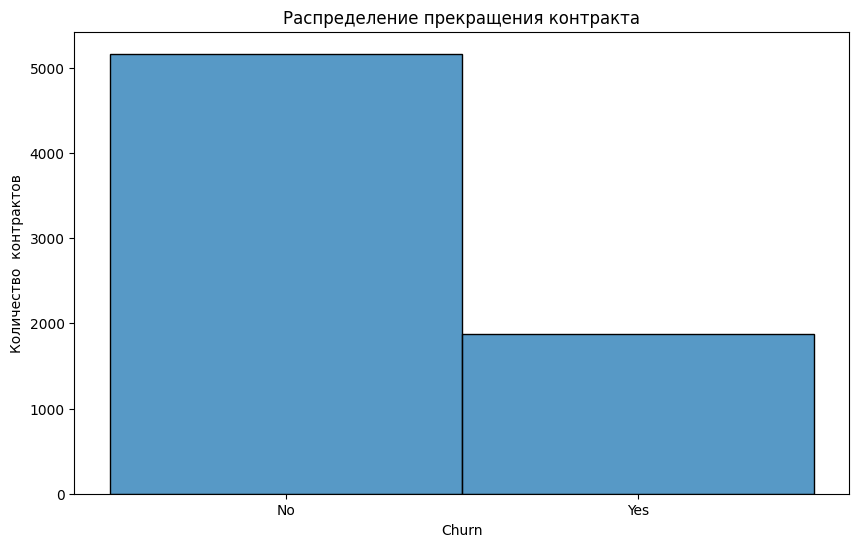

In [120]:
plt.figure(figsize=(10,6))
sb.histplot(data["Churn"], bins=20)
plt.title("Распределение прекращения контракта")
plt.ylabel("Количество  контрактов")
plt.show()

**КОРРЕЛЯЦИЯ** **ОТНОСИТЕЛЬНО Churn**

Text(0.5, 1.0, 'Корреляция относительно Churn')

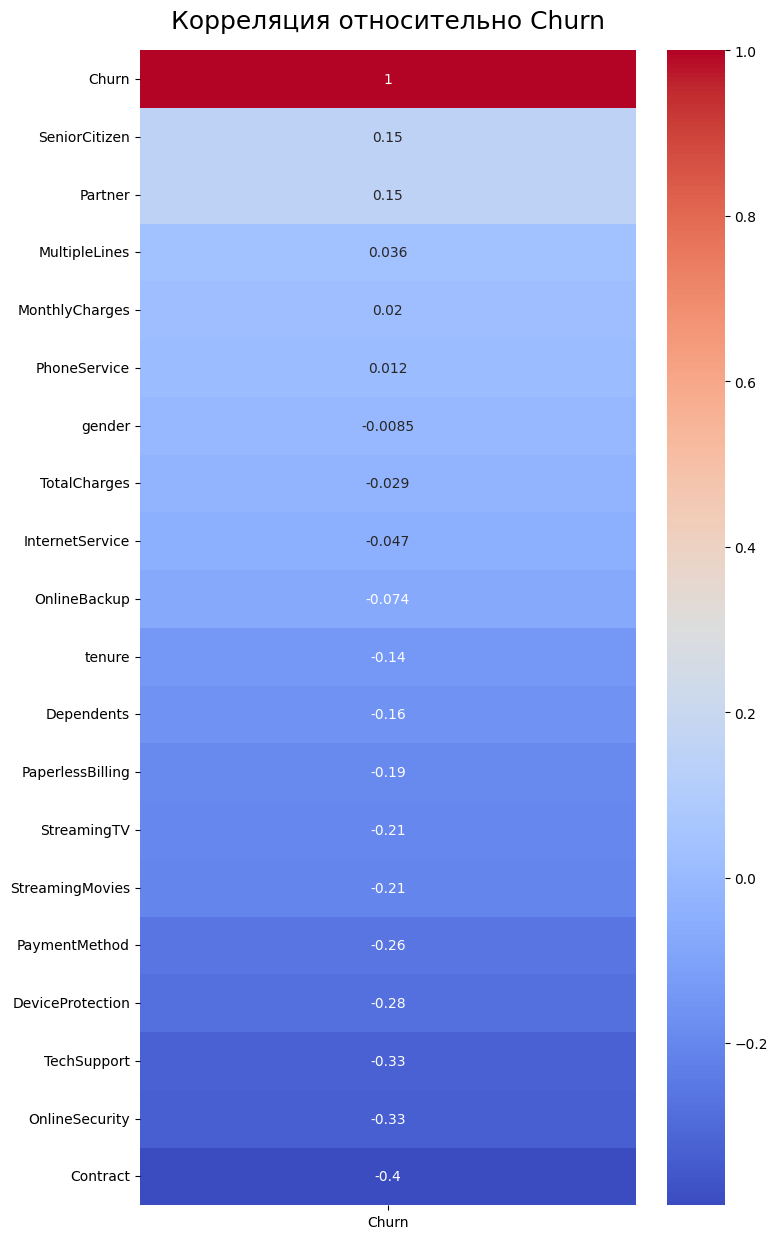

In [ ]:
plt.subplots(figsize=(8, 15))
heatmap = sb.heatmap(data.apply(lambda x : pd.factorize(x)[0]).corr()[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm')
heatmap.set_title('Корреляция относительно Churn', fontdict={'fontsize':18}, pad=16)

 **Вывод:**


***Следующие параметры в наибольшей степени влияют на выбор клиента:***

Условия контракта 0,39

Подключение услуги онлайн-безопасности - 0,33

Наличие техподдержки 0,32


***Чуть меньше влияют:***

Метод оплаты -0,26

Подключение услуги защиты устройства -0,28



***Незначительно влияют:***

Кол-во месяцев пользования услугами -0,14

Наличие партнера 0,14

Статус пенсионера 0,15

Наличие иждевенцев -0,16

Подключение услуги электронных счетов -0,19

Подключение потоковых кино сервисов (И ТВ) -0,2



***В наименьшей степени на целевую переменную влияют:***

 Пол -0,008

 Подключение услуги телефонной связи  0,011

 Сумма, снимаемая с клиента ежемесячно, 0,02 и общая сумма -0,02

 Подключение услуги нескольких линий 0,036

 Тип услуг интернета -0,04

 Есть ли услуга резервной копии -0,07

# **БЛОК МАШИННОГО ОБУЧЕНИЯ**

В данном случае нам необходимо воспользоваться моделями классификации, которая будет распределять данные по 2 классам. Для решения задачи подойдут следующие модели:

- Логистическая регрессия
- Дерево решений
- Метод случайного леса
- K-ближайших соседей
- Байесовский классификатор


In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn. linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score

from sklearn.naive_bayes import GaussianNB

In [59]:
#Разбиение  выборки на обучающую и тестовую. X - данные с признаками, y - значения целевой переменной
X = data.apply(lambda x : pd.factorize(x)[0]).drop(columns = ['Churn'])
y = data.apply(lambda x : pd.factorize(x)[0])['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #Обучающая 80%, тестовая 20%, random_state = 0  Получаем одни и те же наборы данных

**Логистическая** **регрессия**

Логистическая регрессия — статистическая модель, используемая для прогнозирования вероятности возникновения некоторого события путём его сравнения с логистической кривой. Эта регрессия выдаёт ответ в виде вероятности бинарного события.


In [77]:
log_regression = LogisticRegression() #Логистическая регрессия
log_regression.fit(X_train,y_train) #Обучение
y_pred_log_regression = log_regression.predict(X_test) #Предсказание
mae = mean_absolute_error(y_test, y_pred_log_regression)
mse = mean_squared_error(y_test, y_pred_log_regression)
accuracy = accuracy_score(y_test, y_pred_log_regression)
conf_matrix = confusion_matrix(y_test, y_pred_log_regression)

print(f"Mean Absolute Error (MAE): {round(mae, 2)}")
print(f"Mean Squared Error (MSE): {round(mse, 2)}")
print(f"Accuracy: {round(accuracy, 2)}")
print(f"Confusion Matrix:\n{conf_matrix}")

Mean Absolute Error (MAE): 0.21
Mean Squared Error (MSE): 0.21
Accuracy: 0.79
Confusion Matrix:
[[921 117]
 [183 186]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Дерево решений**

Дерево принятия решений — средство поддержки принятия решений, использующееся в машинном обучении, анализе данных и статистике. Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны признаки, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — признаки, по которым различаются случаи. Чтобы классифицировать новый случай, надо спуститься по дереву до листа и выдать соответствующее значение.

In [78]:
tree_clf = tree.DecisionTreeClassifier() #Дерево решений
tree_clf.fit(X_train,y_train) #Обучение
y_pred_tree = tree_clf.predict(X_test) #Предсказание
mae = mean_absolute_error(y_test, y_pred_tree)
mse = mean_squared_error(y_test, y_pred_tree)
accuracy = accuracy_score(y_test, y_pred_tree)
conf_matrix = confusion_matrix(y_test, y_pred_tree)

print(f"Mean Absolute Error (MAE): {round(mae, 2)}")
print(f"Mean Squared Error (MSE): {round(mse, 2)}")
print(f"Accuracy: {round(accuracy, 2)}")
print(f"Confusion Matrix:\n{conf_matrix}")

Mean Absolute Error (MAE): 0.26
Mean Squared Error (MSE): 0.26
Accuracy: 0.74
Confusion Matrix:
[[853 185]
 [179 190]]


**Метод случайного леса**

Метод случайного леса — алгоритм машинного обучения, заключающийся в использовании ансамбля решающих деревьев. Основная идея заключается в использовании большого ансамбля решающих деревьев, каждое из которых само по себе даёт очень невысокое качество классификации, но за счёт их большого количества результат получается хорошим.



In [92]:
clf = RandomForestClassifier(n_estimators=100, max_depth=7) #Случайный лес
clf.fit(X_train, y_train) #Обучение
y_pred_forest = clf.predict(X_test)#Предсказание
mae = mean_absolute_error(y_test, y_pred_forest)
mse = mean_squared_error(y_test, y_pred_forest)
accuracy = accuracy_score(y_test, y_pred_forest)
conf_matrix = confusion_matrix(y_test, y_pred_forest)

print(f"Mean Absolute Error (MAE): {round(mae, 2)}")
print(f"Mean Squared Error (MSE): {round(mse, 2)}")
print(f"Accuracy: {round(accuracy, 2)}")
print(f"Confusion Matrix:\n{conf_matrix}")

Mean Absolute Error (MAE): 0.21
Mean Squared Error (MSE): 0.21
Accuracy: 0.79
Confusion Matrix:
[[947  91]
 [206 163]]


**K-ближайших соседей**

Метод k-ближайших соседей — метрический алгоритм для автоматической классификации объектов или регрессии. В случае использования метода для классификации объект присваивается тому классу, который является наиболее распространённым среди k соседей данного элемента, классы которых уже известны. В случае использования метода для регрессии, объекту присваивается среднее значение по k ближайшим к нему объектам, значения которых уже известны.


In [131]:
model = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)#Обучение K-ближайших соседей
y_pred_KN = model.predict(X_test)#Предсказание

mae = mean_absolute_error(y_test, y_pred_KN)
mse = mean_squared_error(y_test, y_pred_KN)
accuracy = accuracy_score(y_test, y_pred_KN)
conf_matrix = confusion_matrix(y_test, y_pred_KN)

print(f"Mean Absolute Error (MAE): {round(mae, 2)}")
print(f"Mean Squared Error (MSE): {round(mse, 2)}")
print(f"Accuracy: {round(accuracy, 2)}")
print(f"Confusion Matrix:\n{conf_matrix}")


Mean Absolute Error (MAE): 0.29
Mean Squared Error (MSE): 0.29
Accuracy: 0.71
Confusion Matrix:
[[989  49]
 [352  17]]


**Байесовский классификатор**

Наивный байесовский классификатор — простой вероятностный классификатор, основанный на применении теоремы Байеса со строгими (наивными) предположениями о независимости. В зависимости от точной природы вероятностной модели, наивные байесовские классификаторы могут обучаться очень эффективно.

In [132]:
model = GaussianNB().fit(X_train, y_train) #Обучение Байесовского классификатора
y_pred_Gauss = model.predict(X_test) #Предсказание


mae = mean_absolute_error(y_test, y_pred_Gauss)
mse = mean_squared_error(y_test, y_pred_Gauss)
accuracy = accuracy_score(y_test, y_pred_Gauss)
conf_matrix = confusion_matrix(y_test, y_pred_Gauss)

# Вывод результатов
print(f"Mean Absolute Error (MAE): {round(mae, 2)}")
print(f"Mean Squared Error (MSE): {round(mse, 2)}")
print(f"Accuracy: {round(accuracy, 2)}")
print(f"Confusion Matrix:\n{conf_matrix}")

Mean Absolute Error (MAE): 0.3
Mean Squared Error (MSE): 0.3
Accuracy: 0.7
Confusion Matrix:
[[680 358]
 [ 65 304]]


**ВЫВОДЫ**

Логистическая регрессия и Случайный лес показали наилучшие результаты

ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ:

MAE, MSE: 0.21

Accuracy: 0.79

-----------

СЛУЧАЙНЫЙ ЛЕС


MAE, MSE: 0.21


Accuracy: 0.79

--------------

ДЕРЕВО РЕШЕНИЙ:

MAE, MSE: 0.26


Accuracy: 0.74

-----------

К-БЛИЖАЙШИХ СОСЕДЕЙ

MAE, MSE: 0.29

Accuracy: 0.71

-----

БАЙЕСОВСКИЙ КЛАСИФИКАТОР

MAE, MSE: 0.3

Accuracy: 0.7

